In [1]:
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
##Test from customize image
## importing classes from the file that is located in the different folder
from tensorflow.keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import save_img
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import imutils 
from imutils import paths
from keras.optimizers import Adam
import pickle
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
import sys
import os

Using TensorFlow backend.


In [0]:
import pickle

DATA_PATH = "/content/drive/My Drive/Age_Gender_Classification/pickle"
infile = open(DATA_PATH+'/X_75.pickle','rb')
datavalue = pickle.load(infile)
datavalue = np.array(datavalue)

labelfile = open(DATA_PATH+'/Y_75_withoutmlb.pickle','rb')
labels = pickle.load(labelfile)

In [4]:
labels = np.array(labels)


# binarize the labels using scikit-learn's special multi-label
# binarizer implementation
print("[INFO] class labels:")
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

[INFO] class labels:
1. (0, 2)
2. (15, 20)
3. (25, 32)
4. (38, 43)
5. (4, 6)
6. (48, 53)
7. (60, 100)
8. (8, 12)
9. f
10. m


In [0]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(datavalue,
	labels, test_size=0.2, random_state=42)

In [0]:
## Save the data and label as pickel
import pickle

f = open(DATA_PATH+"/trainX.pickle", "wb")
f.write(pickle.dumps(trainX))
f.close()

f = open(DATA_PATH+"/trainY.pickle", "wb")
f.write(pickle.dumps(trainY))
f.close()

f = open(DATA_PATH+"/testX.pickle", "wb")
f.write(pickle.dumps(testX))
f.close()

f = open(DATA_PATH+"/testY.pickle", "wb")
f.write(pickle.dumps(testY))
f.close()


In [10]:
from google.colab import files
src = list(files.upload().values())[0]
open('minivggnet.py','wb').write(src)
import minivggnet

Saving minivggnet.py to minivggnet.py


In [11]:
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
import minivggnet
from minivggnet import MiniVGGNet
NUM_EPOCHS = 50
INIT_LR = 0.00092
BS = 100
IMAGE_DIMS = (75, 75, 3)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=0.0)
model = MiniVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0], depth=IMAGE_DIMS[2], classes= len(mlb.classes_))
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


[INFO] compiling model...












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
# train the network
print("[INFO] training network...")
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=NUM_EPOCHS)

[INFO] training network...
Epoch 1/50
122/122 [==============================] - 22s 184ms/step - loss: 0.4201 - acc: 0.8289 - val_loss: 0.4244 - val_acc: 0.8269
Epoch 2/50
122/122 [==============================] - 22s 181ms/step - loss: 0.3996 - acc: 0.8354 - val_loss: 0.4158 - val_acc: 0.8250
Epoch 3/50
122/122 [==============================] - 22s 180ms/step - loss: 0.3814 - acc: 0.8425 - val_loss: 0.3781 - val_acc: 0.8408
Epoch 4/50
122/122 [==============================] - 22s 180ms/step - loss: 0.3645 - acc: 0.8477 - val_loss: 0.3587 - val_acc: 0.8515
Epoch 5/50
122/122 [==============================] - 22s 179ms/step - loss: 0.3538 - acc: 0.8521 - val_loss: 0.3315 - val_acc: 0.8601
Epoch 6/50
122/122 [==============================] - 22s 181ms/step - loss: 0.3379 - acc: 0.8569 - val_loss: 0.3185 - val_acc: 0.8694
Epoch 7/50
122/122 [==============================] - 22s 179ms/step - loss: 0.3259 - acc: 0.8624 - val_loss: 0.3304 - val_acc: 0.8655
Epoch 8/50
122/122 [========

In [16]:
# save the model to disk

basePath='/content/drive/My Drive/Age_Gender_Classification/Model/'
print("[INFO] serializing network...")
model.save(basePath+"minivgg_V1_img75_50Epo_91_91va.model")




[INFO] serializing network...


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)       

**Save Model History**

In [17]:
base_path = '/content/drive/My Drive/Age_Gender_Classification/Model/History/'

base_path = base_path+'Historyminivgg_V1.pickle'
# serialize the training history to disk
print("[INFO] serializing training history...")
f = open(base_path, "wb")
f.write(pickle.dumps(H.history))
f.close()

[INFO] serializing training history...


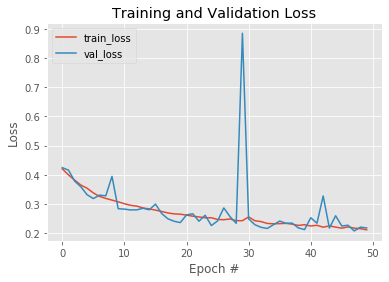

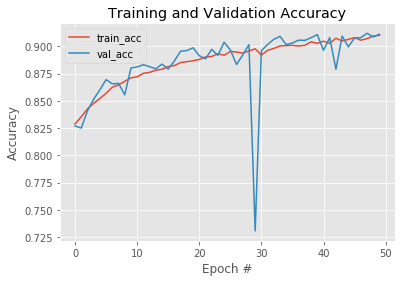

In [18]:
# plot the Training and Validation Loss
plt.style.use("ggplot")
plt.figure()
N = NUM_EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.savefig("NewNet8_V1_Training_Validation_Loss_plot")

# plot the training and Validation accuracy
plt.style.use("ggplot")
plt.figure()
N = NUM_EPOCHS
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.savefig("NewNet8_V1_Training_Validation_Accuracy_plot")

In [0]:
preds = model.predict(testX)

In [20]:
from sklearn.metrics import classification_report
#age = LABELSTEST[preds[0:8].argmax()]
#gender = LABELSTEST[preds[8:10].argmax()+8]

LABELS = ["(0, 2)", "(15, 20)", "(25, 32)", "(38, 43)", "(4, 6)", "(48, 53)", "(60, 100)",
 "(8, 12)", "f", "m"] # Age in 0 to 8 index and Gender in 8 to 10 index

testY_Age = testY[:, 0:8].argsort()[:, 7] #testY[:][0:8].argmax() # Collect the index of age from 0 to 8 index
prediction_Age = np.argsort(preds[:, 0:8])[:, 7] # Collect the index of gender from 8 to 10 index

print('TestY_Age:', testY_Age)
print('Prediction_Gender:', prediction_Age)

testY_Gender = testY[:, 8:10].argsort()[:, 1]+8 # copy the Column two value to testY_C2 , 8 is added to cound index 8 and 9 as the index 8:10 is cound 0 or 1
prediction_Gender = np.argsort(preds[:, 8:10])[:, 1]+8 # copy the Column two value to prediction_C2
print('TestY_Gender:', testY_Gender)
print('Prediction_Gender:', prediction_Gender)

# concatenate two set
testY_F = np.concatenate((testY_Age, testY_Gender), axis = 0) 
prediction_F = np.concatenate((prediction_Age, prediction_Gender), axis = 0)

print('TestY_F:', testY_F)
print('Prediction_F:', prediction_F)


#print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))
print(classification_report(testY_F, prediction_F, target_names=LABELS))

TestY_Age: [1 3 5 ... 1 3 2]
Prediction_Gender: [2 5 5 ... 1 3 2]
TestY_Gender: [8 9 8 ... 8 9 9]
Prediction_Gender: [8 9 8 ... 8 9 9]
TestY_F: [1 3 5 ... 8 9 9]
Prediction_F: [2 5 5 ... 8 9 9]
              precision    recall  f1-score   support

      (0, 2)       0.82      0.79      0.80       250
    (15, 20)       0.71      0.41      0.52       357
    (25, 32)       0.55      0.78      0.64       824
    (38, 43)       0.48      0.57      0.52       501
      (4, 6)       0.77      0.69      0.73       396
    (48, 53)       0.41      0.26      0.32       174
   (60, 100)       0.70      0.59      0.64       155
     (8, 12)       0.79      0.48      0.60       411
           f       0.89      0.94      0.92      1604
           m       0.93      0.88      0.90      1464

    accuracy                           0.76      6136
   macro avg       0.71      0.64      0.66      6136
weighted avg       0.78      0.76      0.76      6136



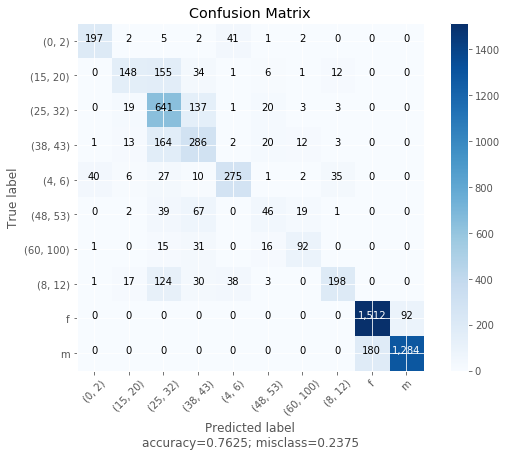

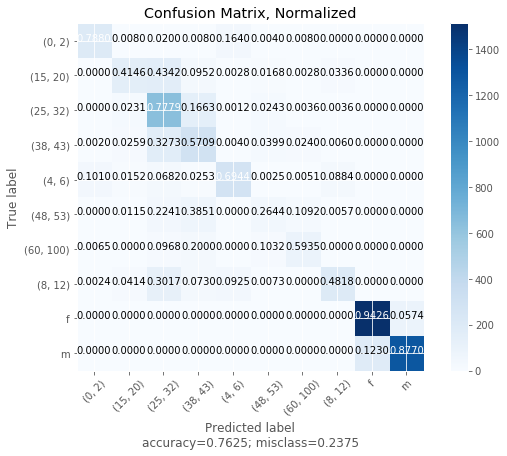

In [21]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,
                  target_names,
                  title='Confusion matrix',
                  cmap=None,
                  normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
cm = confusion_matrix(testY_F, prediction_F)
plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = False,
                      target_names = LABELS,
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = True,
                      target_names = LABELS,
                      title        = "Confusion Matrix, Normalized")

**Histogram**

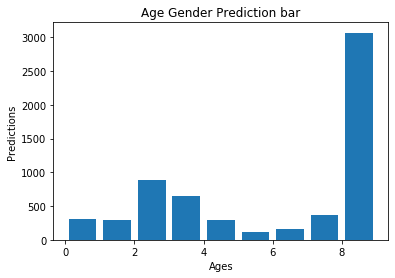

In [0]:
index = np.arange(len(mlb.classes_))
plt.bar = (index, prediction_F)
plt.hist(prediction_F, index, histtype='bar', rwidth=0.8) 
plt.xlabel('Ages')
plt.ylabel('Predictions')
plt.title('Age Gender Prediction bar')
plt.show()